### Data sources: https://gamalytic.com/

### data preparing

In [41]:

import pandas as pd
import glob

# # List all CSV files to be merged
# csv_files = glob.glob("games-list*.csv")  # This matches all files like data1.csv, data2.csv, etc.
# # Read and merge all CSV files
# merged_data = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# # Save the merged data to a new CSV file
# merged_data.to_csv("games_Horror.csv", index=False)

# print("All CSV files merged and saved to 'merged_data.csv'.")


### Add the 'game type' variable into the original dataset 

### preprocess

In [42]:
# Replace 'utf-8' with the detected encoding

def process_game_data(file_path):
    df = pd.read_csv(file_path, encoding='utf-8')
    df['firstReleaseDate'] = pd.to_datetime(df['firstReleaseDate'], unit='ms').dt.date  # adjust date format
    df = df.drop(['earlyAccessExitDate', 'steamId'], axis=1)
    return df

# Process each dataset using the function
df_Action = process_game_data('D:/games_review/games_Action.csv')
df_Adventure = process_game_data('D:/games_review/games_Adventure.csv')
df_Casual = process_game_data('D:/games_review/games_Casual.csv')
df_Horror = process_game_data('D:/games_review/games_Horror.csv')
df_Multiplayer = process_game_data('D:/games_review/games_Multiplayer.csv')
df_Racing = process_game_data('D:/games_review/games_Racing.csv')
df_RPG = process_game_data('D:/games_review/games_RPG.csv')
df_Simulation = process_game_data('D:/games_review/games_Simulation.csv')
df_Sport = process_game_data('D:/games_review/games_Sport.csv')
df_Strategy = process_game_data('D:/games_review/games_Strategy.csv')


### Processing mssing value in the data

In [43]:
## data1
df_Action['publishers'] = df_Action['publishers'].fillna(df_Action['developers'])
df_Action['developers'] = df_Action['developers'].fillna(df_Action['publishers'])
# df_Action[pd.isna(df_Action['publishers']) == True]
df_Action['Action'] = 1  # add game type column

## data2
df_Adventure['publishers'] = df_Adventure['publishers'].fillna(df_Adventure['developers'])
df_Adventure['developers'] = df_Adventure['developers'].fillna(df_Adventure['publishers'])
df_Adventure['Adventure'] = 1
# pd.isna(df_Adventure).any()
df_Adventure[pd.isna(df_Adventure['publishers']) == True]
df_Adventure = df_Adventure.dropna(subset=['publishers', 'developers'], how='all', axis=0)
df_Adventure = df_Adventure.reset_index(drop=True)

## data3
df_Casual['publishers'] = df_Casual['publishers'].fillna(df_Casual['developers'])
df_Casual['developers'] = df_Casual['developers'].fillna(df_Casual['publishers'])
df_Casual['Casual'] = 1
df_Casual = df_Casual.dropna(subset=['publishers', 'developers'], how='all', axis=0)
df_Casual = df_Casual.reset_index(drop=True)

## data4
df_Horror['publishers'] = df_Horror['publishers'].fillna(df_Horror['developers'])
df_Horror['developers'] = df_Casual['developers'].fillna(df_Horror['publishers'])
df_Horror['Horror'] = 1
df_Horror = df_Horror.dropna(subset=['publishers', 'developers'], how='all', axis=0)
df_Horror = df_Horror.reset_index(drop=True)

## data5
df_Multiplayer['publishers'] = df_Multiplayer['publishers'].fillna(df_Multiplayer['developers'])
df_Multiplayer['developers'] = df_Casual['developers'].fillna(df_Multiplayer['publishers'])
df_Multiplayer['Multiplayer'] = 1
df_Multiplayer = df_Multiplayer.dropna(subset=['publishers', 'developers'], how='all', axis=0)
df_Multiplayer = df_Multiplayer.reset_index(drop=True)

## data6
df_Racing['publishers'] = df_Racing['publishers'].fillna(df_Racing['developers'])
df_Racing['developers'] = df_Racing['developers'].fillna(df_Racing['publishers'])
df_Racing['Racing'] = 1
df_Racing = df_Racing.dropna(subset=['publishers', 'developers'], how='all', axis=0)
df_Racing = df_Racing.reset_index(drop=True)

## data7
df_RPG['publishers'] = df_RPG['publishers'].fillna(df_RPG['developers'])
df_RPG['developers'] = df_RPG['developers'].fillna(df_RPG['publishers'])
df_RPG['RPG'] = 1
df_RPG = df_RPG.dropna(subset=['publishers', 'developers'], how='all', axis=0)
df_RPG = df_RPG.reset_index(drop=True)

## data8
df_Simulation['publishers'] = df_Simulation['publishers'].fillna(df_Simulation['developers'])
df_Simulation['developers'] = df_Simulation['developers'].fillna(df_Simulation['publishers'])
df_Simulation['Simulation'] = 1
df_Simulation = df_Simulation.dropna(subset=['publishers', 'developers'], how='all', axis=0)
df_Simulation = df_Simulation.reset_index(drop=True)

## data9
df_Sport['publishers'] = df_Sport['publishers'].fillna(df_Sport['developers'])
df_Sport['developers'] = df_Sport['developers'].fillna(df_Sport['publishers'])
df_Sport['Sport'] = 1
df_Sport = df_Sport.dropna(subset=['publishers', 'developers'], how='all', axis=0)
df_Sport = df_Sport.reset_index(drop=True)

## data10
df_Strategy['publishers'] = df_Strategy['publishers'].fillna(df_Strategy['developers'])
df_Strategy['developers'] = df_Strategy['developers'].fillna(df_Strategy['publishers'])
df_Strategy['Strategy'] = 1
df_Strategy = df_Strategy.dropna(subset=['publishers', 'developers'], how='all', axis=0)
df_Strategy = df_Strategy.reset_index(drop=True)

### merge data with different game type

In [44]:
df_combined = pd.concat([df_Action, df_Adventure, df_Casual, df_Horror, df_Multiplayer, df_RPG, df_Racing, df_Simulation, df_Sport, df_Strategy], axis = 0)
df_combined = df_combined.groupby('name', as_index=False).agg({
    'Action': 'sum', 'Adventure': 'sum', 'Casual': 'sum', 'Horror': 'sum','Multiplayer': 'sum','Racing': 'sum', 'RPG': 'sum', 'Simulation': 'sum','Sport': 'sum','Strategy': 'sum',
    'firstReleaseDate': 'first', 'earlyAccess': 'first', 'copiesSold': 'first', 'price': 'first', 'revenue': 'first', 'avgPlaytime': 'first', 'reviewScore': 'first',
    'publisherClass': 'first', 'publishers': 'first','developers': 'first','steamUrl': 'first',
})

up_columns = ['Action', 'Adventure', 'Casual', 'Horror', 'Multiplayer', 'Racing', 'RPG', 'Simulation', 'Sport', 'Strategy'] 
for up_col in up_columns:
    df_combined[up_col] = df_combined[up_col].replace(2,1)

print(df_combined.shape)
print(df_combined.columns)
# print(pd.isna(df_combined).any())

(17254, 22)
Index(['name', 'Action', 'Adventure', 'Casual', 'Horror', 'Multiplayer',
       'Racing', 'RPG', 'Simulation', 'Sport', 'Strategy', 'firstReleaseDate',
       'earlyAccess', 'copiesSold', 'price', 'revenue', 'avgPlaytime',
       'reviewScore', 'publisherClass', 'publishers', 'developers',
       'steamUrl'],
      dtype='object')


### output

In [45]:
df_combined.to_csv('D:/games_review/games_data_after_cleaning.csv')

### exploring data

In [46]:
df_sort = df_combined.sort_values(by = 'copiesSold', ascending = False)
df_sort.reset_index(drop = True).head(5)

,name,Action,Adventure,Casual,Horror,Multiplayer,Racing,RPG,Simulation,Sport,...,earlyAccess,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamUrl
0,Banana,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,False,46218443,0.00,3.981672e+05,0.000000,0,Indie,Sky,"Sky,AestheticSpartan,O'Brian",https://store.steampowered.com/app/2923300
1,Black Myth: Wukong,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,False,21664557,59.99,9.439992e+08,49.184779,96,AAA,Game Science,Game Science,https://store.steampowered.com/app/2358720
2,Palworld,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,True,18514659,29.99,4.342901e+08,74.079835,94,AA,Pocketpair,Pocketpair,https://store.steampowered.com/app/1623730
3,Marvel Rivals,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,False,13666863,0.00,3.783294e+07,29.273741,80,AA,NetEase Games,NetEase Games,https://store.steampowered.com/app/2767030
4,HELLDIVERS™ 2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,False,12288018,39.99,4.393810e+08,68.774171,74,AAA,PlayStation Publishing LLC,Arrowhead Game Studios,https://store.steampowered.com/app/553850


### Shows the frequency of games' copiesSold

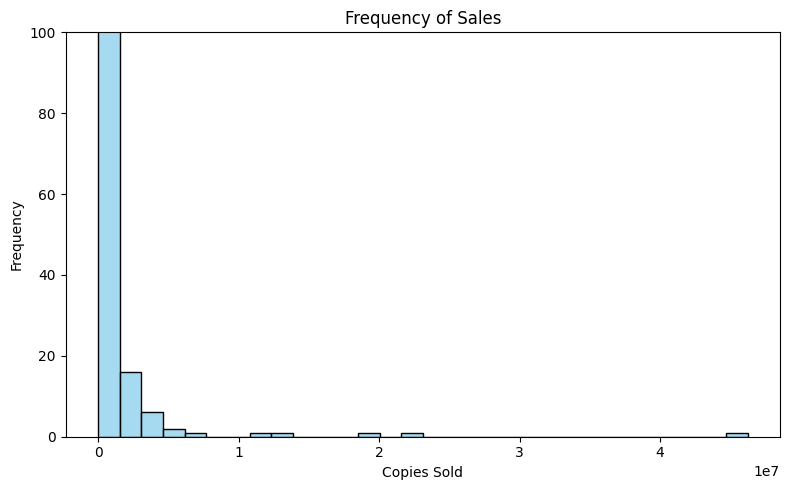

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=df_combined, x='copiesSold', bins=30, color='skyblue', kde=False)

# Customize the plot
plt.title('Frequency of Sales')
plt.xlabel('Copies Sold')
plt.ylabel('Frequency')
plt.ylim([0, 100])  # Set y-axis limit
plt.tight_layout()
plt.show()


In [48]:
print(f'percentage of games over 10000 copy sales: {round((len(df_combined[df_combined['copiesSold'] > 100000])/len(df_combined))*100, 2)}%')

percentage of games over 10000 copy sales: 1.68%


#### From the plot above, the sales frequency follows an exponential distribution, with sales heavily concentrated in the 0 to 1,000 range. This pattern reveals the highly competitive nature of the game industry, where only a small fraction of titles achieve significant commercial success. 
##### The data shows that only approximately 1.68% of games reach 10,000 copies sold, highlighting the challenging market dynamics where very few games manage to stand out and achieve strong sales performance. This long-tail distribution suggests that success in the gaming market is relatively rare, with most titles experiencing modest sales figures despite the industry's overall growth.

## Fit some models to see the relationship between features and the copiesSold
### Drop the outliers and draw a heatmap to chech if there is any multicollinearity effect(any of two features in regression is dependent to each other)

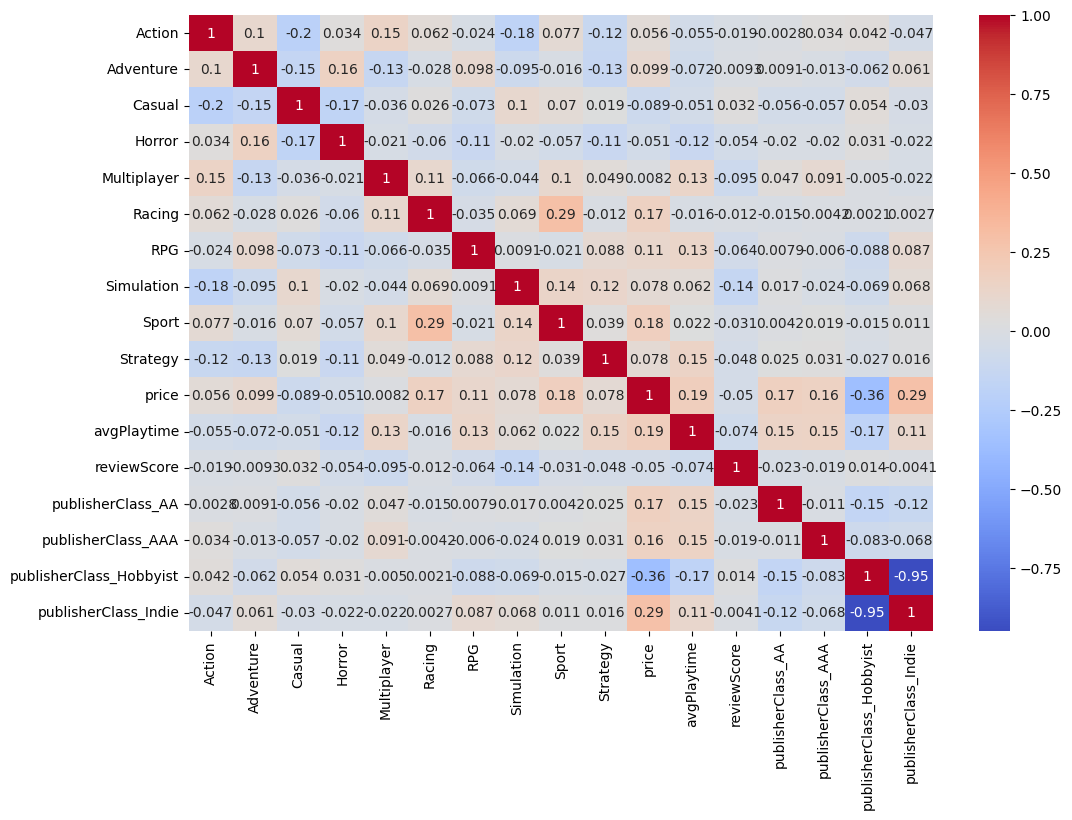

In [49]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

df_combined = df_combined[(df_combined['avgPlaytime'] > 0) & (df_combined['reviewScore'] > 0) & (df_combined['copiesSold'] > 100)]
df_combined = df_combined.reset_index(drop = True)

# Calculate Z-scores for each column (you can adjust the columns based on your data)
df_combined['z_avgPlaytime'] = zscore(df_combined['avgPlaytime'])
df_combined['z_reviewScore'] = zscore(df_combined['reviewScore'])
df_combined['z_copiesSold'] = zscore(df_combined['copiesSold'])

# Filter out rows where Z-scores are greater than 3 or less than -3
df_combined = df_combined[(df_combined['z_avgPlaytime'].abs() <= 3) & 
                          (df_combined['z_reviewScore'].abs() <= 3) & 
                          (df_combined['z_copiesSold'].abs() <= 3)]

# Reset index after filtering
df_combined = df_combined.reset_index(drop=True)
# y = copiesSold
## linear
df_combined_new = df_combined.dropna(subset=['avgPlaytime', 'reviewScore'], how='all', axis=0)
# print(pd.isna(df_Adventure).any())
df_combined_new = pd.get_dummies(df_combined_new, columns=['earlyAccess', 'publisherClass'], dtype=int)
X = df_combined_new.drop(columns=['z_avgPlaytime', 'z_reviewScore', 'z_copiesSold', 'name', 'copiesSold', 'firstReleaseDate','publishers', 'developers', 'steamUrl', 'revenue', 'earlyAccess_False', 'earlyAccess_True'], axis=1)
y = df_combined_new['copiesSold']
scale = StandardScaler()
y_scaled = scale.fit_transform(y.values.reshape(-1,1))

# Assuming X is your feature matrix
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(X).corr(), annot=True, cmap='coolwarm')

plt.show()

#### There is no obvious strong correlation for each feature(except publisher class, but it is quite normal since they are one hot encoding)

## linear regression

In [50]:
from statsmodels.robust.robust_linear_model import RLM

X_add_constant = sm.add_constant(X)
linear_model = sm.OLS(y_scaled, X_add_constant).fit()
linear_model.summary()

# rlm_model = RLM(y_scaled, X_add_constant, M=sm.robust.norms.HuberT())
# rlm_results = rlm_model.fit()
# rlm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     50.61
Date:                Tue, 21 Jan 2025   Prob (F-statistic):          9.45e-154
Time:                        16:21:41   Log-Likelihood:                -10710.
No. Observations:                7820   AIC:                         2.145e+04
Df Residuals:                    7803   BIC:                         2.157e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1103      0.065      1.694      0.090      -0.017       0.238
Action                      0.0441      0.024      1.857      0.063      -0.002       0.091
Adventure                   0.0187      0.023      0.815      0.415      -0.026       0.064
Casual                     -0.0196      0.023     -0.857      0.392      -0.065       0.025
Horror                      0.1000      0.038      2.663      0.008       0.026       0.174
Multiplayer                 0.3058      0.034      9.001      0.000       0.239       0.372
Racing                     -0.0017      0.066     -0.026      0.979      -0.131       0.128
RPG                         0.0080      0.027      0.302      0.763      -0.044       0.060
Simulation                  0.1442      0.026      5.644      0.000       0.094       0.194
Sport                      -0.1237      0.060     -2.078      0.038      -0.241      -0.007
Strategy                   -0.0291      0.028     -1.054      0.292      -0.083       0.025
price                      -0.0017      0.001     -1.773      0.076      -0.003       0.000
avgPlaytime                 0.0169      0.001     12.449      0.000       0.014       0.020
reviewScore                 0.0030      0.001      4.075      0.000       0.002       0.004
publisherClass_AA           0.4749      0.070      6.829      0.000       0.339       0.611
publisherClass_AAA          0.7542      0.117      6.440      0.000       0.525       0.984
publisherClass_Hobbyist    -0.6663      0.039    -17.096      0.000      -0.743      -0.590
publisherClass_Indie       -0.4525      0.038    -11.915      0.000      -0.527      -0.378
==============================================================================
Omnibus:                    13808.714   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14726034.013
Skew:                          12.685   Prob(JB):                         0.00
Kurtosis:                     214.072   Cond. No.                     7.90e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.11e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [51]:
## using lasso to select the important feature
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size = 0.2, random_state=10)

## scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_model = Ridge(alpha=100, max_iter=100000, random_state=10)
lasso_model.fit(X_train_scaled, y_train)
lasso_y_pred = lasso_model.predict(X_test_scaled)

# Calculate MSE
MSE = mean_squared_error(y_test, lasso_y_pred)
print(f"Coefficients: {lasso_model.coef_}")
print('MSE of lasso model:', MSE)

r2 = r2_score(y_test, lasso_y_pred)
print(f"Decision Tree R² Score: {r2:.4f}")

Coefficients: [ 0.02218492  0.01400754 -0.01067842  0.02916102  0.11436437  0.00071695
  0.00140765  0.0659603  -0.02028371 -0.01645027 -0.02541334  0.15282743
  0.03880815  0.13540914  0.0804294  -0.07873517  0.02787159]
MSE of lasso model: 0.45334364073756317
Decision Tree R² Score: 0.1469


#### From the linear regression model, we know average playtime, publisher class, review score and some types of games have is sifnigicant to affect sales performance of games. Therefore, in order to look more deep into the data. I decide to find the relationship of these features.

### For review score, it is important for player to purchase a game. Aim to this perspective, I would like to do some analysis on each feature and review score as well 

In [52]:
# y = Review Score
## linear
df_combined_new = df_combined.dropna(subset=['avgPlaytime', 'reviewScore'], how='all', axis=0)
# print(pd.isna(df_Adventure).any())
df_combined_new = pd.get_dummies(df_combined_new, columns=['earlyAccess', 'publisherClass'], dtype=int)
X = df_combined_new.drop(columns=['z_avgPlaytime', 'z_reviewScore', 'z_copiesSold', 'reviewScore', 'name', 'firstReleaseDate','publishers', 'developers', 'steamUrl', 'revenue', 'earlyAccess_False', 'earlyAccess_True'], axis=1)
y = df_combined_new['reviewScore']
scale = StandardScaler()
X['copiesSold'] = scale.fit_transform(X['copiesSold'].values.reshape(-1,1))
y_scaled = scale.fit_transform(y.values.reshape(-1,1))
df_combined_new.dtypes
X_add_constant = sm.add_constant(X)
linear_model = sm.OLS(y_scaled, X_add_constant).fit()
linear_model.summary()

# rlm_model = RLM(y_scaled, X_add_constant, M=sm.robust.norms.HuberT())
# rlm_results = rlm_model.fit()
# rlm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     24.16
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           1.81e-70
Time:                        16:21:41   Log-Likelihood:                -10907.
No. Observations:                7820   AIC:                         2.185e+04
Df Residuals:                    7803   BIC:                         2.197e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1926      0.042      4.602      0.000       0.111       0.275
Action                     -0.0628      0.024     -2.577      0.010      -0.111      -0.015
Adventure                  -0.0395      0.024     -1.674      0.094      -0.086       0.007
Casual                      0.0310      0.023      1.318      0.187      -0.015       0.077
Horror                     -0.2322      0.038     -6.042      0.000      -0.308      -0.157
Multiplayer                -0.3060      0.035     -8.781      0.000      -0.374      -0.238
Racing                      0.0378      0.068      0.558      0.577      -0.095       0.171
RPG                        -0.1555      0.027     -5.704      0.000      -0.209      -0.102
Simulation                 -0.3403      0.026    -13.102      0.000      -0.391      -0.289
Sport                      -0.0016      0.061     -0.027      0.979      -0.121       0.118
Strategy                   -0.0608      0.028     -2.149      0.032      -0.116      -0.005
copiesSold                  0.0473      0.012      4.075      0.000       0.025       0.070
price                      -0.0017      0.001     -1.785      0.074      -0.004       0.000
avgPlaytime                -0.0064      0.001     -4.540      0.000      -0.009      -0.004
publisherClass_AA           0.0089      0.070      0.126      0.900      -0.129       0.147
publisherClass_AAA         -0.0012      0.120     -0.010      0.992      -0.236       0.234
publisherClass_Hobbyist     0.0770      0.038      2.002      0.045       0.002       0.152
publisherClass_Indie        0.1080      0.037      2.931      0.003       0.036       0.180
==============================================================================
Omnibus:                     1222.817   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1894.264
Skew:                          -1.113   Prob(JB):                         0.00
Kurtosis:                       3.929   Cond. No.                     1.54e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.1e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Based on linear regression above, we found price and average playtime and certain type of games have significant affect on review

## Games type analysis

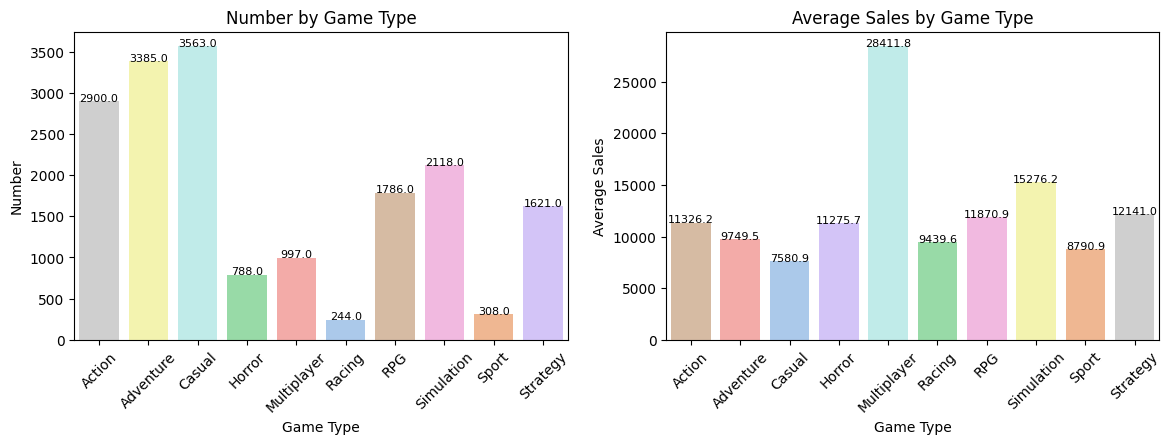

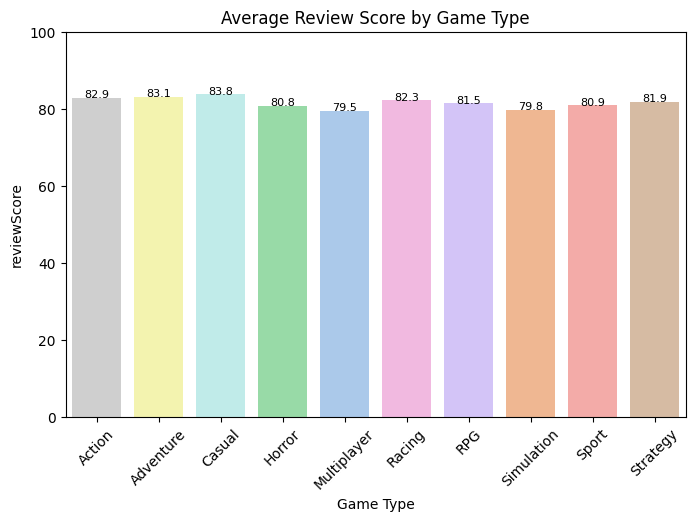

In [53]:
X_columns = ['Action', 'Adventure', 'Casual', 'Horror', 'Multiplayer', 'Racing', 'RPG', 'Simulation', 'Sport', 'Strategy'] 

# 1. Number of each game genre
number_each = []
for col in X_columns:
    number = df_combined[col].sum()
    number_each.append(number)
df_number = pd.DataFrame({'Genre': X_columns, 'number': number_each})


# 2. average sales of each genre
sales_number_each = []
for col in X_columns:
    avg_sales = df_combined.groupby(col)['copiesSold'].mean().sort_values(ascending=False)
    sales_number_each.append(avg_sales[1])
df_avg_sales = pd.DataFrame({'Genre': X_columns, 'avg_sales': sales_number_each})

# 3. review score of each game genre
#get rid of those with 0 review score(error input or not enough review)
df_combined_new_review = df_combined[df_combined['reviewScore']!=0]
df_combined_new_review.reset_index(drop = True)
avg_score_each = []
for col in X_columns:
    avg_score = df_combined_new_review.groupby(col)['reviewScore'].mean().sort_values(ascending=False)
    avg_score_each.append(avg_score[1])
    # print(f"Average sales by {col}:\n{avg_sales}\n")
## review score dataframe
df_avg_score = pd.DataFrame({'Genre': X_columns, 'reviewScore': avg_score_each})

# 4. Average Playtime of each game genre
df_combined_new_playtime = df_combined[df_combined['avgPlaytime']!=0]
df_combined_new_playtime.reset_index(drop = True)
avg_playtime_each = []
for col in X_columns:
    avg_playtime = df_combined_new_playtime.groupby(col)['avgPlaytime'].mean().sort_values(ascending=False)
    avg_playtime_each.append(avg_playtime[1])
## Average Playtime dataframe
df_avg_playtime = pd.DataFrame({'Genre': X_columns, 'avgPlaytime': avg_playtime_each})

## Plotting the bar plot
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

sns.barplot(data=df_number, x='Genre', y='number', palette='pastel', hue='number', legend=False, ax=ax[0])
for index, row in df_number.iterrows():
    ax[0].text(index, row['number'], f"{row['number']:.1f}", ha='center', fontsize=8)
ax[0].set_title('Number by Game Type')
ax[0].set_xlabel('Game Type') 
ax[0].set_ylabel('Number')  
ax[0].tick_params(axis='x', labelrotation=45)

sns.barplot(data=df_avg_sales, x='Genre', y='avg_sales', palette='pastel', hue='avg_sales', legend=False, ax=ax[1])
for index, row in df_avg_sales.iterrows():
    ax[1].text(index, row['avg_sales'], f"{row['avg_sales']:.1f}", ha='center', fontsize=8)
ax[1].set_title('Average Sales by Game Type')
ax[1].set_xlabel('Game Type') 
ax[1].set_ylabel('Average Sales')  
ax[1].tick_params(axis='x', labelrotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(data=df_avg_score, x='Genre', y='reviewScore', palette='pastel', hue='reviewScore', legend=False)
for index, row in df_avg_score.iterrows():
    plt.text(index, row['reviewScore'], f"{row['reviewScore']:.1f}", ha='center', fontsize=8)
plt.title('Average Review Score by Game Type')
plt.ylim([0,100])
plt.xlabel('Game Type') 
plt.tick_params(axis='x', labelrotation=45)

plt.show()

### 1. Sales Distribution by Game Type
- Analysis shows Multiplayer games have the highest average sales (28,411.8 copies) among all game types

### 2. Genre Impact on Sales Performance
- The regression results demonstrate significant positive relationships between sales and certain genres:
    - Multiplayer (coef: 0.3058, p<0.001)
    - Simulation (coef: 0.1442, p<0.001)
    - Horror (coef: 0.1000, p=0.008)
- Conversely, Sports games show a significant negative relationship (coef: -0.1237, p=0.038) with sales performance.

### 3. Genre Impact on Review Scores
- Several genres show significant negative associations with review scores:
    - Action (coef: -0.0628, p=0.010)
    - Horror (coef: -0.2322, p<0.001)
    - Multiplayer (coef: -0.3060, p<0.001)
    - RPG (coef: -0.1555, p<0.001)
    - Simulation (coef: -0.3403, p<0.001)

### 4. Sales-Review Score Relationship
- An interesting pattern emerges for Horror and Multiplayer games:
    - Despite positive sales performance coefficients, they show negative associations with review scores, which indicate that these two category have good sales           performance but with lower satisfaction
    - Improving game experience of player in these category might be a critical issue

## Publisher Class and Sales

publisherClass
AAA         99576.739130
AA          74714.935484
Indie       15756.873053
Hobbyist     2224.284630
Name: copiesSold, dtype: float64


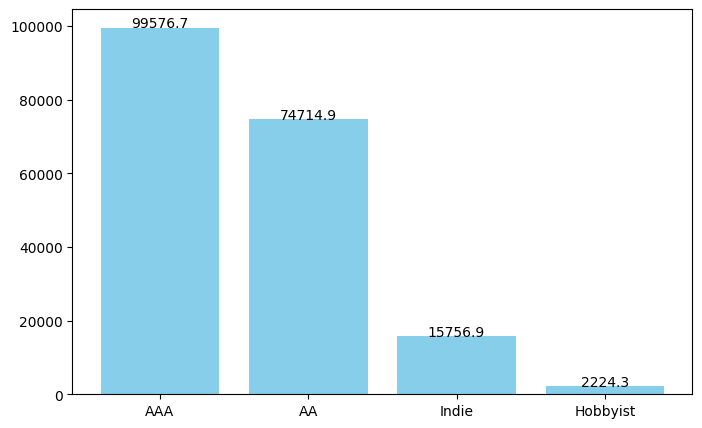

In [54]:
# df_combined['publisherClass'].unique()
avg_publisher_sales = df_combined.groupby('publisherClass')['copiesSold'].mean().sort_values(ascending=False)
print(avg_publisher_sales)
plt.figure(figsize=(8, 5))
plt.bar(avg_publisher_sales.index, avg_publisher_sales.values, color='skyblue')
for index, value in enumerate(avg_publisher_sales):
    plt.text(index, value, f"{value:.1f}", ha='center', fontsize=10)
plt.show()

### The better the class of the game is clasified, the better sales performance is.

## Average Playtime and Sales

In [55]:
from sklearn.cluster import KMeans
import numpy as np

df_1 = df_combined[['avgPlaytime', 'copiesSold']].copy()


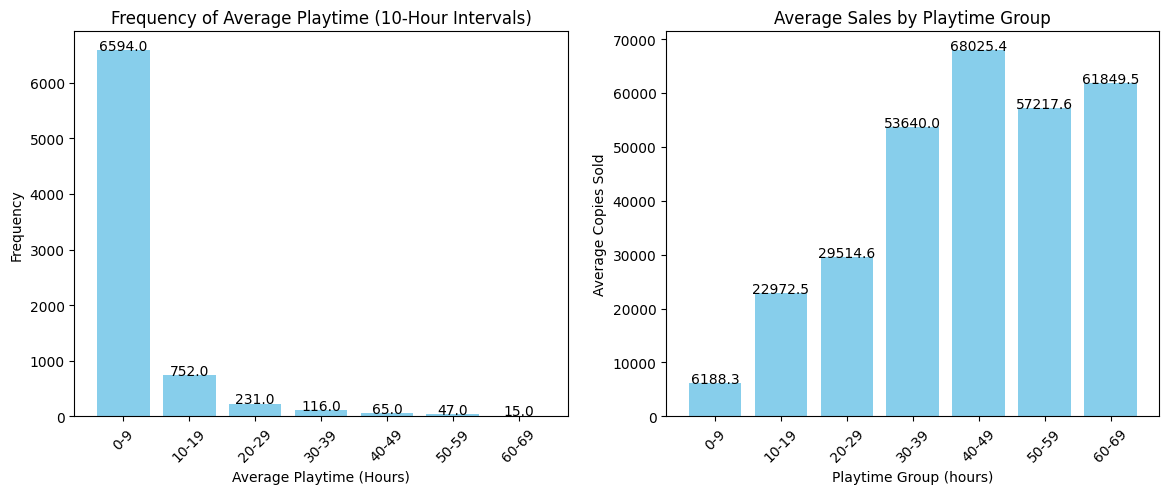

In [56]:
## Frequency of Average Playtime (10-Hour Intervals)
# Define bin edges for 10-hour intervals
bin_edges = range(0, int(df_1['avgPlaytime'].max()) + 10, 10)
# Create interval labels
bin_labels = [f"{i}-{i+9}" for i in bin_edges[:-1]]
# Bin the avgPlaytime into intervals
df_1['avgPlaytime_Group'] = pd.cut(df_1['avgPlaytime'], bins=bin_edges, labels=bin_labels, right=False)
# Calculate frequency of each interval
playtime_frequency = df_1['avgPlaytime_Group'].value_counts().sort_index()

fig, ax = plt.subplots(1,2, figsize=(14, 5))
ax[0].bar(playtime_frequency.index.astype(str), playtime_frequency.values, color='skyblue')
ax[0].tick_params(axis='x', rotation=45)
for index, value in enumerate(playtime_frequency):
    ax[0].text(index, value, f"{value:.1f}", ha='center', fontsize=10)
ax[0].set_title('Frequency of Average Playtime (10-Hour Intervals)')
ax[0].set_xlabel('Average Playtime (Hours)')
ax[0].set_ylabel('Frequency')
ax[0].tick_params(axis='x', rotation=45)

# Sort by playtime group order (intervals from low to high)
sales_playtime_sum = df_1.groupby('avgPlaytime_Group', observed=False)['copiesSold'].mean()

ax[1].bar(sales_playtime_sum.index.astype(str), sales_playtime_sum.values, color='skyblue')
ax[1].tick_params(axis='x', rotation=45)
for index, value in enumerate(sales_playtime_sum):
    ax[1].text(index, value, f"{value:.1f}", ha='center', fontsize=10)
ax[1].set_title('Average Sales by Playtime Group')
ax[1].set_xlabel('Playtime Group (hours)')
ax[1].set_ylabel('Average Copies Sold')

plt.show()




### 1. Short Playtime and Sales Performance: Most games have an average playtime of under 10 hours, and these games generally exhibit lower average sales. This trend highlights the competitive nature of the gaming industry, where players often spend limited time on games that fail to capture their interest or stand out. This suggests that games lacking unique features or engaging elements struggle to retain players.

### 2. Success of High-Engagement Games: A smaller percentage of games stand out by achieving both higher average playtime and better sales performance. These games demonstrate that players are more likely to invest time and money in titles that provide a compelling and engaging experience.

### 3. Playtime as a Potential Indicator of Commercial Success: The findings suggest a possible association between average playtime and a game's commercial success. While the data shows that games with longer playtimes tend to have higher sales, this relationship does not confirm causality. Further investigation is needed to determine whether increased playtime directly influences sales or if other factors contribute to this trend. Developers may explore ways to enhance player engagement, as it could align with improved market performance. 

## Playtime and review score

### Cluster

Cluster
0    7254
1     566
Name: count, dtype: int64


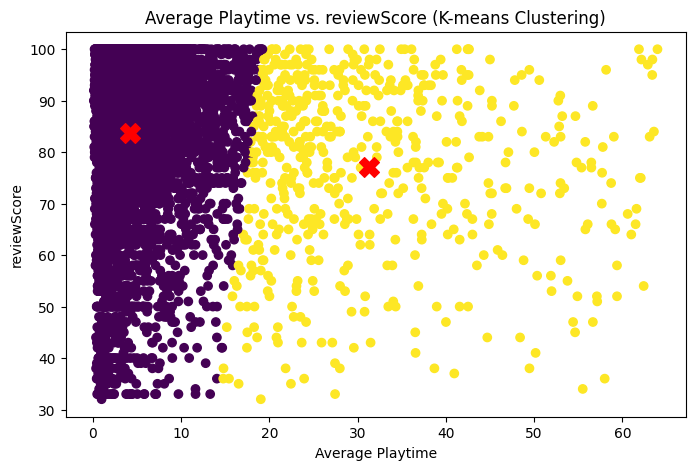

Cluster
0    83.758754
1    77.162544
Name: reviewScore, dtype: float64
max average playtime of cluster 0: 63.98251171147025


In [57]:
from sklearn.cluster import KMeans

df_2 = df_combined[['avgPlaytime', 'reviewScore']].copy()
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df_2)
optimal_k = 2  # Replace with the optimal number of clusters from the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df2_scaled)

# Add cluster labels to the original dataset
df_2['Cluster'] = kmeans.labels_
print(df_2['Cluster'].value_counts())

# Inverse transform the cluster centers back to original scale
centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)

# Scatter plot with corrected centroids
plt.figure(figsize=(8, 5))
plt.scatter(df_2['avgPlaytime'], df_2['reviewScore'], c=df_2['Cluster'], cmap='viridis')
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], s=200, c='red', marker='X')  # Centroids
plt.title('Average Playtime vs. reviewScore (K-means Clustering)')
plt.xlabel('Average Playtime')
plt.ylabel('reviewScore')
plt.show()

sales_hr = df_2.groupby('Cluster')['reviewScore'].mean()
print(sales_hr)
print('max average playtime of cluster 0:' ,np.max(df_2[df_2['Cluster']==1]['avgPlaytime']))

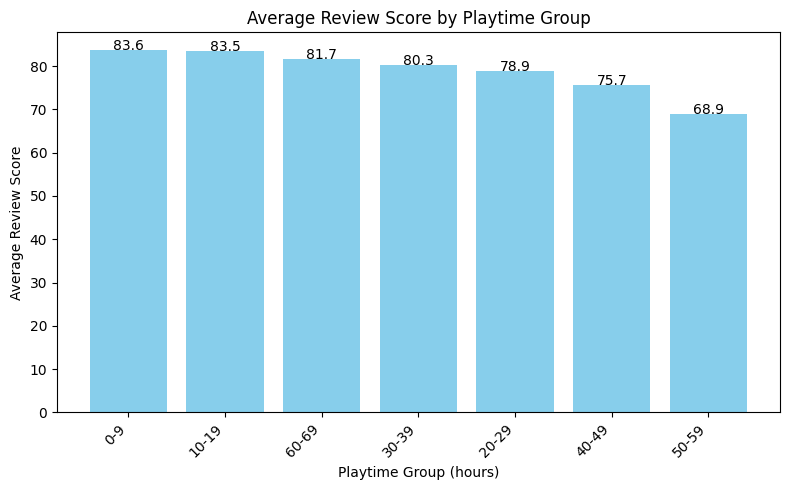

In [58]:
df_2_cluster01 = df_2[df_2['Cluster'].isin([0, 1])]
# Group avgPlaytime into bins (0-5, 6-10, etc.)
bin_edges_2 = range(0, int(df_2_cluster01['avgPlaytime'].max()) + 10, 10)  # Define bin edges with interval of 5
bin_labels_2 = [f"{i}-{i+9}" for i in bin_edges_2[:-1]]  # Define bin labels (adjusted for 5-hour intervals)
df_2_cluster01.loc[:, 'Playtime_Group'] = pd.cut(df_2_cluster01['avgPlaytime'], bins=bin_edges_2, labels=bin_labels_2, right=False)

# Aggregate sum of sales by playtime groups
sales_playtime_sum = df_2_cluster01.groupby('Playtime_Group', observed=False)['reviewScore'].mean().sort_values(ascending=False)

# Plot the aggregated data
plt.figure(figsize=(8, 5))
plt.bar(sales_playtime_sum.index.astype(str), sales_playtime_sum.values, color='skyblue')
plt.xticks(rotation=45, ha='right')
for index, value in enumerate(sales_playtime_sum):
    plt.text(index, value, f"{value:.1f}", ha='center', fontsize=10)
plt.title('Average Review Score by Playtime Group')
plt.xlabel('Playtime Group (hours)')
plt.ylabel('Average Review Score')
plt.tight_layout()
plt.show()


### 1. Games with playtime under 20 hours, despite having poor sales performance, tend to receive positive review scores. This suggests that players who download these games generally have a favorable opinion of them. These games may possess certain characteristics that attract positive ratings, but possibly lack sufficient resources for marketing or content development, which could explain their low sales performance
### 2. After removing the outliers, it is evident that most players spend less than 64 hours playing a game, indicating that the majority of players' playtime is concentrated within this range

### Price and review score

### Drop all free games(price=0) because there are too many free game in this data that may affect the outcome(cause the imbalance)
### Purpuse: See the relation between price and review score after dopping all the free game 
### The range of the price of all games is pretty wide. Therefore, I only do the comparing of two groups(3A,2A games)(Independent games)

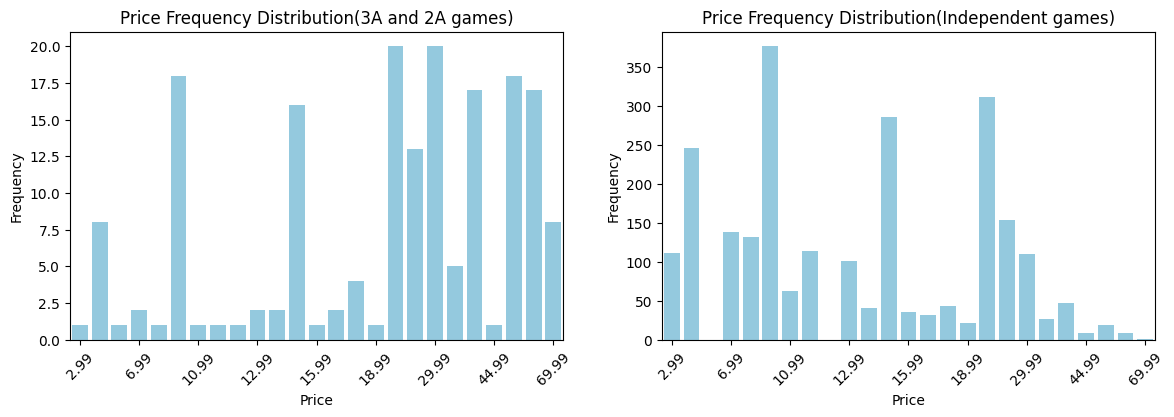

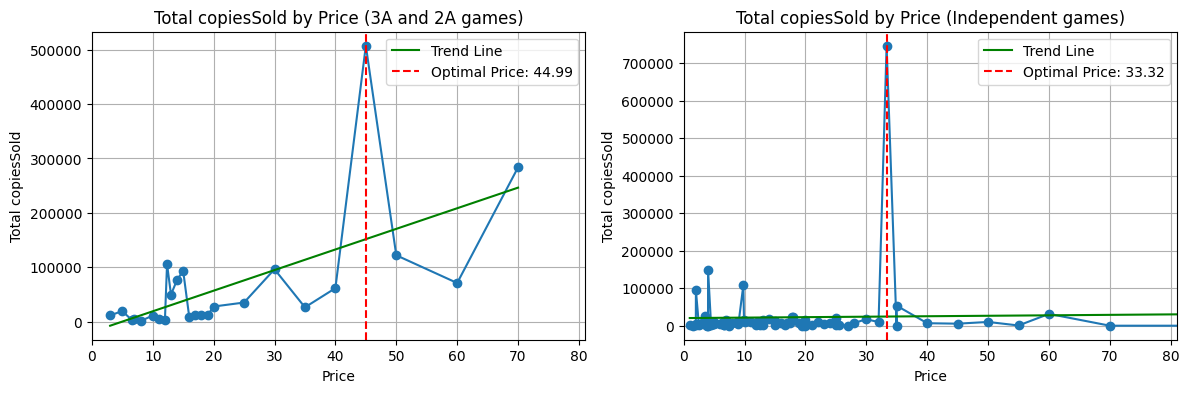

The optimal price for maximum copiesSold(3A and 2A games): 44.99
The maximum copiesSold at this price(3A and 2A games): 507028.0
The optimal price for maximum copiesSold(Independent games): 33.32
The maximum copiesSold at this price(Independent games): 746889.0


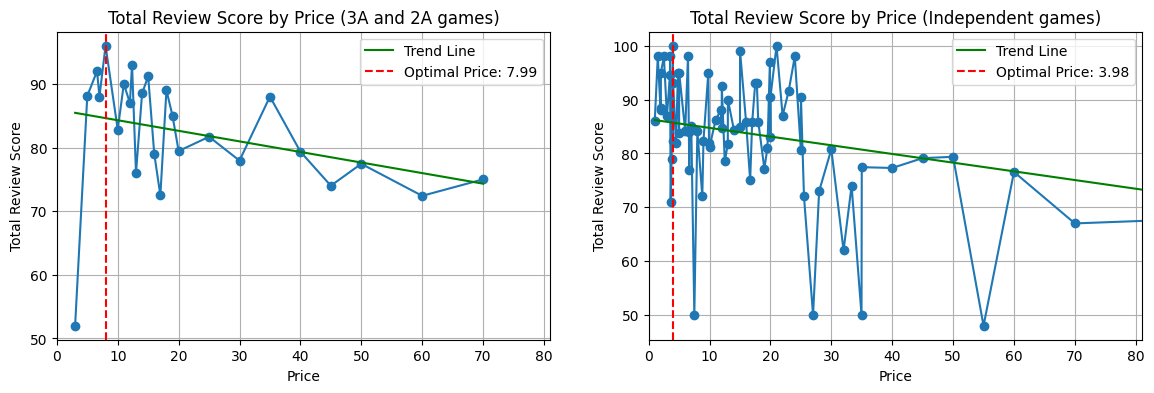

The optimal price for maximum review score(3A and 2A games): 7.99
The maximum review score at this price(3A and 2A games): 96.0
The optimal price for maximum review score(Independent games): 3.98
The maximum review score at this price(Independent games): 100.0


In [59]:
import numpy as np
from matplotlib.ticker import MaxNLocator

df_combined_no_outlier = df_combined.drop(df_combined[(df_combined['price'] == 500) | (df_combined['price'] == 0)].index)
df_combined_no_outlier_3a = df_combined_no_outlier[(df_combined_no_outlier['publisherClass'] == 'AAA') | (df_combined_no_outlier['publisherClass'] == 'AA')]# For 3A and 2A games
df_combined_no_outlier_3a = df_combined_no_outlier_3a.reset_index(drop = True)
df_combined_no_outlier_indie = df_combined_no_outlier[(df_combined_no_outlier['publisherClass'] == 'Indie')]# For Independent games
df_combined_no_outlier_indie = df_combined_no_outlier_indie.reset_index(drop = True)

# Sort the prices numerically
price_order = sorted(df_combined_no_outlier_3a['price'].unique())  # Get unique prices in ascending order
# Plot the countplot with the sorted order
fig, ax = plt.subplots(1,2, figsize=(14, 4))
sns.countplot(data=df_combined_no_outlier_3a, x='price', order=price_order, color='skyblue', legend=False, ax=ax[0])
# Update x-axis ticks and rotate labels
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))  # Ensure integer ticks
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_title('Price Frequency Distribution(3A and 2A games)')
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Frequency')
sns.countplot(data=df_combined_no_outlier_indie, x='price', order=price_order, color='skyblue', legend=False, ax=ax[1])
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True))  # Ensure integer ticks
ax[1].tick_params(axis='x', rotation=45)  
ax[1].set_title('Price Frequency Distribution(Independent games)')
ax[1].set_xlabel('Price')
ax[1].set_ylabel('Frequency')
plt.show()

# CopiesSold Aggregate score by price
# Aggregate score by price
score_by_price = df_combined_no_outlier_3a.groupby('price')['copiesSold'].mean()
# Find the optimal price
optimal_price = score_by_price.idxmax()
max_score = score_by_price.max()
score_by_price_indie = df_combined_no_outlier_indie.groupby('price')['copiesSold'].mean()
optimal_price_indie = score_by_price_indie.idxmax()
max_score_indie = score_by_price_indie.max()

# Fit a line 
slope_3a_2a, intercept_3a_2a = np.polyfit(score_by_price.index, score_by_price.values, 1)
line_3a_2a = slope_3a_2a * score_by_price.index + intercept_3a_2a
slope_indie, intercept_indie = np.polyfit(score_by_price_indie.index, score_by_price_indie.values, 1)
line_indie = slope_indie * score_by_price_indie.index + intercept_indie

# Plot
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].plot(score_by_price.index, score_by_price.values, marker='o')
ax[0].plot(score_by_price.index, line_3a_2a, color='green', label='Trend Line', linestyle='-')
ax[0].axvline(x=optimal_price, color='red', linestyle='--', label=f'Optimal Price: {optimal_price}')
ax[0].set_xlim([0, 81])
ax[0].set_title('Total copiesSold by Price (3A and 2A games)')
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Total copiesSold')
ax[0].grid()
ax[0].legend()

ax[1].plot(score_by_price_indie.index, score_by_price_indie.values, marker='o')
ax[1].plot(score_by_price_indie.index, line_indie, color='green', label='Trend Line', linestyle='-')
ax[1].axvline(x=optimal_price_indie, color='red', linestyle='--', label=f'Optimal Price: {optimal_price_indie}')
ax[1].set_xlim([0, 81])
ax[1].set_title('Total copiesSold by Price (Independent games)')
ax[1].set_xlabel('Price')
ax[1].set_ylabel('Total copiesSold')
# ax[1].set_ylim([0, 200000])
ax[1].grid()
ax[1].legend()
plt.show()

# Print the optimal price and maximum copiesSold
print(f"The optimal price for maximum copiesSold(3A and 2A games): {optimal_price}")
print(f"The maximum copiesSold at this price(3A and 2A games): {max_score}")
print(f"The optimal price for maximum copiesSold(Independent games): {optimal_price_indie}")
print(f"The maximum copiesSold at this price(Independent games): {max_score_indie}")


# Review score Aggregate score by price
score_by_price = df_combined_no_outlier_3a.groupby('price')['reviewScore'].mean()
# Find the optimal price
optimal_price = score_by_price.idxmax()
max_score = score_by_price.max()
score_by_price_indie = df_combined_no_outlier_indie.groupby('price')['reviewScore'].mean()
optimal_price_indie = score_by_price_indie.idxmax()
max_score_indie = score_by_price_indie.max()


# Fit a line 
slope_3a_2a, intercept_3a_2a = np.polyfit(score_by_price.index, score_by_price.values, 1)
line_3a_2a = slope_3a_2a * score_by_price.index + intercept_3a_2a
slope_indie, intercept_indie = np.polyfit(score_by_price_indie.index, score_by_price_indie.values, 1)
line_indie = slope_indie * score_by_price_indie.index + intercept_indie

# Plot
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].plot(score_by_price.index, score_by_price.values, marker='o')
ax[0].plot(score_by_price.index, line_3a_2a, color='green', label='Trend Line', linestyle='-')
ax[0].axvline(x=optimal_price, color='red', linestyle='--', label=f'Optimal Price: {optimal_price}')
ax[0].set_xlim([0, 81])
ax[0].set_title('Total Review Score by Price (3A and 2A games)')
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Total Review Score')
ax[0].grid()
ax[0].legend()

ax[1].plot(score_by_price_indie.index, score_by_price_indie.values, marker='o')
ax[1].plot(score_by_price_indie.index, line_indie, color='green', label='Trend Line', linestyle='-')
ax[1].axvline(x=optimal_price_indie, color='red', linestyle='--', label=f'Optimal Price: {optimal_price_indie}')
ax[1].set_xlim([0, 81])
ax[1].set_title('Total Review Score by Price (Independent games)')
ax[1].set_xlabel('Price')
ax[1].set_ylabel('Total Review Score')
ax[1].grid()
ax[1].legend()
plt.show()

# Print the optimal price and maximum review score
print(f"The optimal price for maximum review score(3A and 2A games): {optimal_price}")
print(f"The maximum review score at this price(3A and 2A games): {max_score}")
print(f"The optimal price for maximum review score(Independent games): {optimal_price_indie}")
print(f"The maximum review score at this price(Independent games): {max_score_indie}")

### 1. According to Diagrams 1 and 2, most 3A and 2A games are priced between $18.99 and $69.99, whereas most independent games fall within the range of $2.99 to $29.99. This suggests that 3A and 2A games generally have higher prices, possibly due to the higher production and development costs associated with these titles
### 2. Based on Diagrams 3 and 4, 3A and 2A games tend to achieve better sales at higher price points, while independent games do not exhibit a specific pricing-sales pattern. This indicates that price alone may not be the primary factor influencing players' purchasing decisions.
### 3. According to Diagrams 5 and 6, 3A, 2A, and independent games all tend to receive better review scores at lower price points. This trend suggests that affordability might contribute to higher player satisfaction (as reflected in review scores).
### 4. Combining these findings with the results from the linear regression analysis(p-value = 0.076), it appears that price could be a potential factor influencing review scores, although other factors may also play a role.

## Review Score and Copy sold

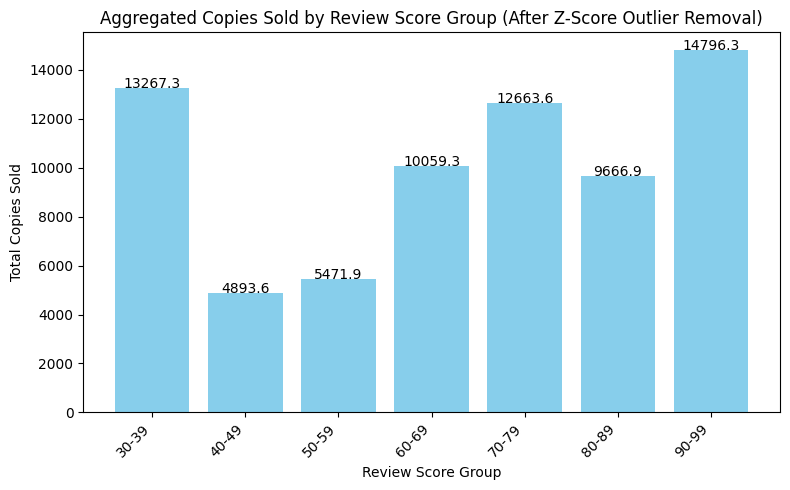

In [60]:
# Calculate Z-scores for the reviewScore column
df_combined['z_score'] = zscore(df_combined['reviewScore'])

# Filter out rows where Z-score is greater than 3 or less than -3 (outliers)
df_filtered = df_combined[(df_combined['z_score'] <= 3) & (df_combined['z_score'] >= -3)].copy()  # Make a copy

# Group reviewScore into intervals of 10
# Adjust the bins to cover the full range (38 to 100), starting from 30 to 100 to include lower scores
bin_edges = range(30, 101, 10)
bin_labels = [f"{i}-{i+9}" for i in bin_edges[:-1]]

# Use .loc to avoid SettingWithCopyWarning
df_filtered.loc[:, 'reviewScore_Group'] = pd.cut(df_filtered['reviewScore'], bins=bin_edges, labels=bin_labels, right=False)

# Aggregate copiesSold by reviewScore group (use observed=False to avoid the FutureWarning)
aggregated_sales = df_filtered.groupby('reviewScore_Group', observed=False)['copiesSold'].mean()

# Plot the aggregated data
plt.figure(figsize=(8, 5))
plt.bar(aggregated_sales.index.astype(str), aggregated_sales.values, color='skyblue')
plt.xticks(rotation=45, ha='right')
for index, value in enumerate(aggregated_sales):
    plt.text(index, value, f"{value:.1f}", ha='center', fontsize=10)
plt.title('Aggregated Copies Sold by Review Score Group (After Z-Score Outlier Removal)')
plt.xlabel('Review Score Group')
plt.ylabel('Total Copies Sold')
plt.tight_layout()
plt.show()


### 1.Bimodal Distribution: There appears to be two peaks in sales:One at the lower end (30-39 score range) with about 13,267 copies, another at the higher end (90-99 score range) with about 14,796 copies

### 2.In the 40-99 review score range, there is a noticeable positive trend between review scores and sales. As review scores increase from the 40-69 range (with sales around 4893 copies) to the 90-99 range (with sales reaching 14,796 copies), sales generally improve. This suggests that games receiving "positive" reviews (i.e., scores above 60) tend to see better sales, with higher review scores correlating with increased sales. However, it's important to note that this relationship does not necessarily imply causality, as other factors could also influence sales.

### 3.Unusual Lower Score Performance: The high sales for poorly reviewed games (30-39 score range) is unexpected, this might suggest effective marketing despite poor reviews, Controversial games that sell well despite criticism, possible price factors (e.g., heavy discounts) not shown in the data


## Discovery：
### 1. Sales Performance and Market Insights
-  Distribution: Sales frequency follows an exponential distribution. Most games sell fewer than 1,000 copies, with only ~2% surpassing 10,000 copies. This highlights the intense competition in the gaming industry.

### 2. Genre Impact on Sales/Review Score:
- Genre Impact on Sales
    - Positive Influencers: Multiplayer, Simulation, and Horror games show significant positive effects on sales.
    - Negative Influencers: Sports games negatively effect sales.
    - Sales Insights by Game Type: Multiplayer games have the highest average sales (28,411.8 copies).
- Genre Impact on Review Score
    - Negative Review Associations:
    - Genres like Action, Horror, Multiplayer, RPG, and Simulation negatively affect review scores, despite good sales performance for some(Horror, Simulation, Multiplayer).
    - This mismatch suggests opportunities to improve player satisfaction in these genres.

### 3. Playtime and Sales Relationship
- Short Playtime Trends: Games with playtime under 10 hours exhibit low sales performance, emphasizing the competitive market where many titles fail to captivate players.
- High-Engagement Success: Games with higher playtime often achieve better sales, suggesting that engagement might drive commercial success.
- Indicator Potential: Longer average playtime correlates with better sales, but causation is unconfirmed. Developers might focus on enhancing engagement to improve sales.

### 4. Price and Sales/Reviews Dynamics
- 3A and 2A Games:
    - Higher prices ($18.99–$69.99) due to production costs.
    - Achieve better sales at these price points.
- Independent Games:
    - Priced between $2.99–$29.99, with no clear price-sales correlation.
- Review Scores:
    - All game types receive better reviews at lower prices, indicating affordability may enhance satisfaction.
    - Price might influence review scores (p-value = 0.076) but is likely one of many contributing factors.

### 5. Review Scores and Sales
- General Trends:
    - Games with review scores above 60 ("positive reviews") tend to achieve better sales.
    - High scores (90-99 range) see significant sales boosts (e.g., 14,796 copies).
- Bimodal Distribution:
    - High sales observed in both poorly reviewed games (30-39 scores) and highly rated games (90-99 scores).
- Unexpected Success of Poorly Reviewed Games:
    - Factors like strong marketing, controversy, or deep discounts might explain high sales despite low scores.

## Strategy that can make to improve sales performance
### 1. Tailored Pricing Strategies:
- For 3A and 2A Games:
    - Maintain premium pricing ($18.99–$69.99) but justify it with quality and content.
- For Independent Games:
    - Experiment with lower price points ($2.99–$29.99) to appeal to a broader audience.

### 2. Improving Review Scores
- Engage with community feedback early and often testing through beta testing method
- Enhance the gaming experience(optimize game difficulty, ensuring item prices are reasonable, and addressing bugs...)

### 3. Maximizing Playtime
- Add features that encourage replayability, such as alternate endings, challenges, or multiplayer options.
- Use tutorials or smoother onboarding to keep players engaged from the start.
- Include frequent updates or seasonal events to retain long-term interest

### 4. Improve engagement for high-sales, low-satisfaction genres like Horror and Multiplayer games:
- Analyze user feedback to identify pain points and improve gameplay quality

### 5. Investigate why certain poorly reviewed games succeed to replicate their marketing strategies